AI for estimating song's popularity

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("dataset.csv")

713/713 [==============================] - 1s 2ms/step
Testowe wartości: [539.164794921875, 19.05821418762207, 539.164794921875]


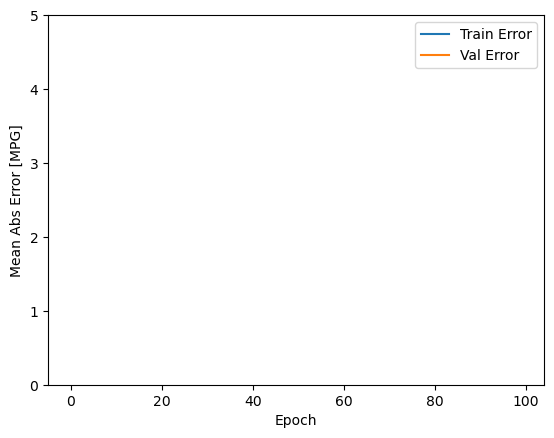

In [12]:
# Wybranie kolumn, które będą używane do szacowania popularności
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Podział danych na zestaw treningowy i testowy
train_df, test_df = train_test_split(data, test_size=0.2)

# Przygotowanie danych treningowych i testowych
train_data = train_df[features]
train_labels = train_df['popularity']
test_data = test_df[features]
test_labels = test_df['popularity']

# Konwertowanie danych treningowych i testowych na tensory zmiennoprzecinkowe
train_data = tf.convert_to_tensor(train_data, dtype=tf.float32)
train_labels = tf.convert_to_tensor(train_labels, dtype=tf.float32)
test_data = tf.convert_to_tensor(test_data, dtype=tf.float32)
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.float32)

# Definicja modelu
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(features)]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Kompilacja modelu
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

# Trenowanie modelu
history = model.fit(train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0)

# Testowanie modelu
test_predictions = model.predict(test_data).flatten()

# Wyświetlenie wyników testowania
test_results = model.evaluate(test_data, test_labels, verbose=0)
print(f'Testowe wartości: {test_results}')

# Wizualizacja wyników
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
             label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    plt.show()

plot_history(history)